# XGBOOST Assignment

Data Description

In this assignment students need to predict whether a person makes over
50K per year or not from classic adult dataset using XGBoost. 

The description of the dataset is as follows:

Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: 
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:

Listing of attributes: >50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,

Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school,

Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,

Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married,

Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial, Prof-specialty, 

Handlers-cleaners, Machine-op-inspct,

Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,

Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico,

Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,

Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,

Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,

Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,

Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, ElSalvador, Trinadad&Tobago, Peru, 

Hong, Holand-Netherlands.

Following is the code to load required libraries and data:

import numpy as np

import pandas as pd

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machinelearning-databases/adult/adult.dat a', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learningdatabases/adult/adult.test' , 

skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels

test_set.columns = col_labels

NOTE:ThesolutionsharedthroughGithubshoul

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In C:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 a

In [2]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [3]:
final=data.copy()

In [4]:
colum=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [5]:
final.columns=colum

In [6]:
final.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# cheacking the shape
final.shape

(32561, 15)

In [8]:
# importing test data
test=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows=2,header=None)

In [9]:
test.columns=colum

In [10]:
test_data=test.copy()

In [11]:
test_data.shape

(16280, 15)

In [12]:
# combining both the dataframe
dataset=pd.concat([final,test_data],axis=0)

In [13]:
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
dataset.shape

(48841, 15)

In [15]:
#cheacking info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48841 entries, 0 to 16279
Data columns (total 15 columns):
age               48841 non-null int64
workclass         48841 non-null object
fnlwgt            48841 non-null int64
education         48841 non-null object
education_num     48841 non-null int64
marital_status    48841 non-null object
occupation        48841 non-null object
relationship      48841 non-null object
race              48841 non-null object
sex               48841 non-null object
capital_gain      48841 non-null int64
capital_loss      48841 non-null int64
hours_per_week    48841 non-null int64
native_country    48841 non-null object
wage_class        48841 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [16]:
# cheacking null values
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [17]:
dataset['wage_class'].value_counts()

 <=50K     24720
 <=50K.    12434
 >50K       7841
 >50K.      3846
Name: wage_class, dtype: int64

In [18]:
wage=[]
for i in dataset['wage_class']:
    i=i.strip()
    
    if i=='<=50K' or i=='<=50K.':
        s=1
        wage.append(s)
        
    else:
        s=0
        wage.append(s)

In [19]:
dataset['wage_class']=wage

In [20]:
dataset['wage_class'].value_counts()

1    37154
0    11687
Name: wage_class, dtype: int64

In [21]:
# checking the value of workclass
dataset['workclass'].value_counts()

 Private             33905
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [22]:
# remving rows contain ?
# workclass=[]
dataset.drop(dataset[dataset['workclass'].str.strip()=='?'].index,inplace=True)
          


In [23]:
# after removing ? values rows
dataset['workclass'].value_counts()

 Private             32595
 Self-emp-not-inc     3702
 Local-gov            3024
 State-gov            1901
 Self-emp-inc         1626
 Federal-gov          1384
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [24]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [25]:
# we will removing the education_num column since eduaction is sufficient
dataset=dataset.drop('education_num',axis=1)

In [26]:
dataset['occupation'].value_counts()

 Prof-specialty       5943
 Craft-repair         5896
 Exec-managerial      5861
 Adm-clerical         5396
 Sales                5291
 Other-service        4715
 Machine-op-inspct    2892
 Transport-moving     2253
 Handlers-cleaners    1994
 Farming-fishing      1430
 Tech-support         1386
 Protective-serv       949
 Priv-house-serv       232
 Armed-Forces           15
 ?                      10
Name: occupation, dtype: int64

In [27]:
# there is some value ? in occupation column so we will remove it
dataset.drop(dataset[dataset['occupation'].str.strip()=='?'].index,inplace=True)

In [28]:
# we also remove the 'fnlwgt' since its just census sampling also occupation and native country because work class is sufficient
# and in native country US is like addinng the bias
dataset=dataset.drop(['fnlwgt','occupation','native_country'],axis=1)

In [29]:
dataset.marital_status.value_counts()

 Married-civ-spouse       20619
 Never-married            14285
 Divorced                  6130
 Separated                 1387
 Widowed                   1246
 Married-spouse-absent      549
 Married-AF-spouse           31
Name: marital_status, dtype: int64

In [30]:
# we will just set two value single and married for maried 1 and for single 0
dataset['marital_status']=dataset['marital_status'].str.strip().map({'Married-civ-spouse':1, 'Divorced':0, 'Never-married':0, 'Separated':0, 
'Widowed':0, 'Married-spouse-absent':1, 'Married-AF-spouse':1})

In [31]:
dataset.head()

,age,workclass,education,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,State-gov,Bachelors,0,Not-in-family,White,Male,2174,0,40,1
1,50,Self-emp-not-inc,Bachelors,1,Husband,White,Male,0,0,13,1
2,38,Private,HS-grad,0,Not-in-family,White,Male,0,0,40,1
4,28,Private,Bachelors,1,Wife,Black,Female,0,0,40,1
6,49,Private,9th,1,Not-in-family,Black,Female,0,0,16,1


In [32]:
# creatind set of dependent and independent feature set
x= dataset.drop('wage_class',axis=1)
y=dataset['wage_class']

In [33]:
x.head()

,age,workclass,education,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,39,State-gov,Bachelors,0,Not-in-family,White,Male,2174,0,40
1,50,Self-emp-not-inc,Bachelors,1,Husband,White,Male,0,0,13
2,38,Private,HS-grad,0,Not-in-family,White,Male,0,0,40
4,28,Private,Bachelors,1,Wife,Black,Female,0,0,40
6,49,Private,9th,1,Not-in-family,Black,Female,0,0,16


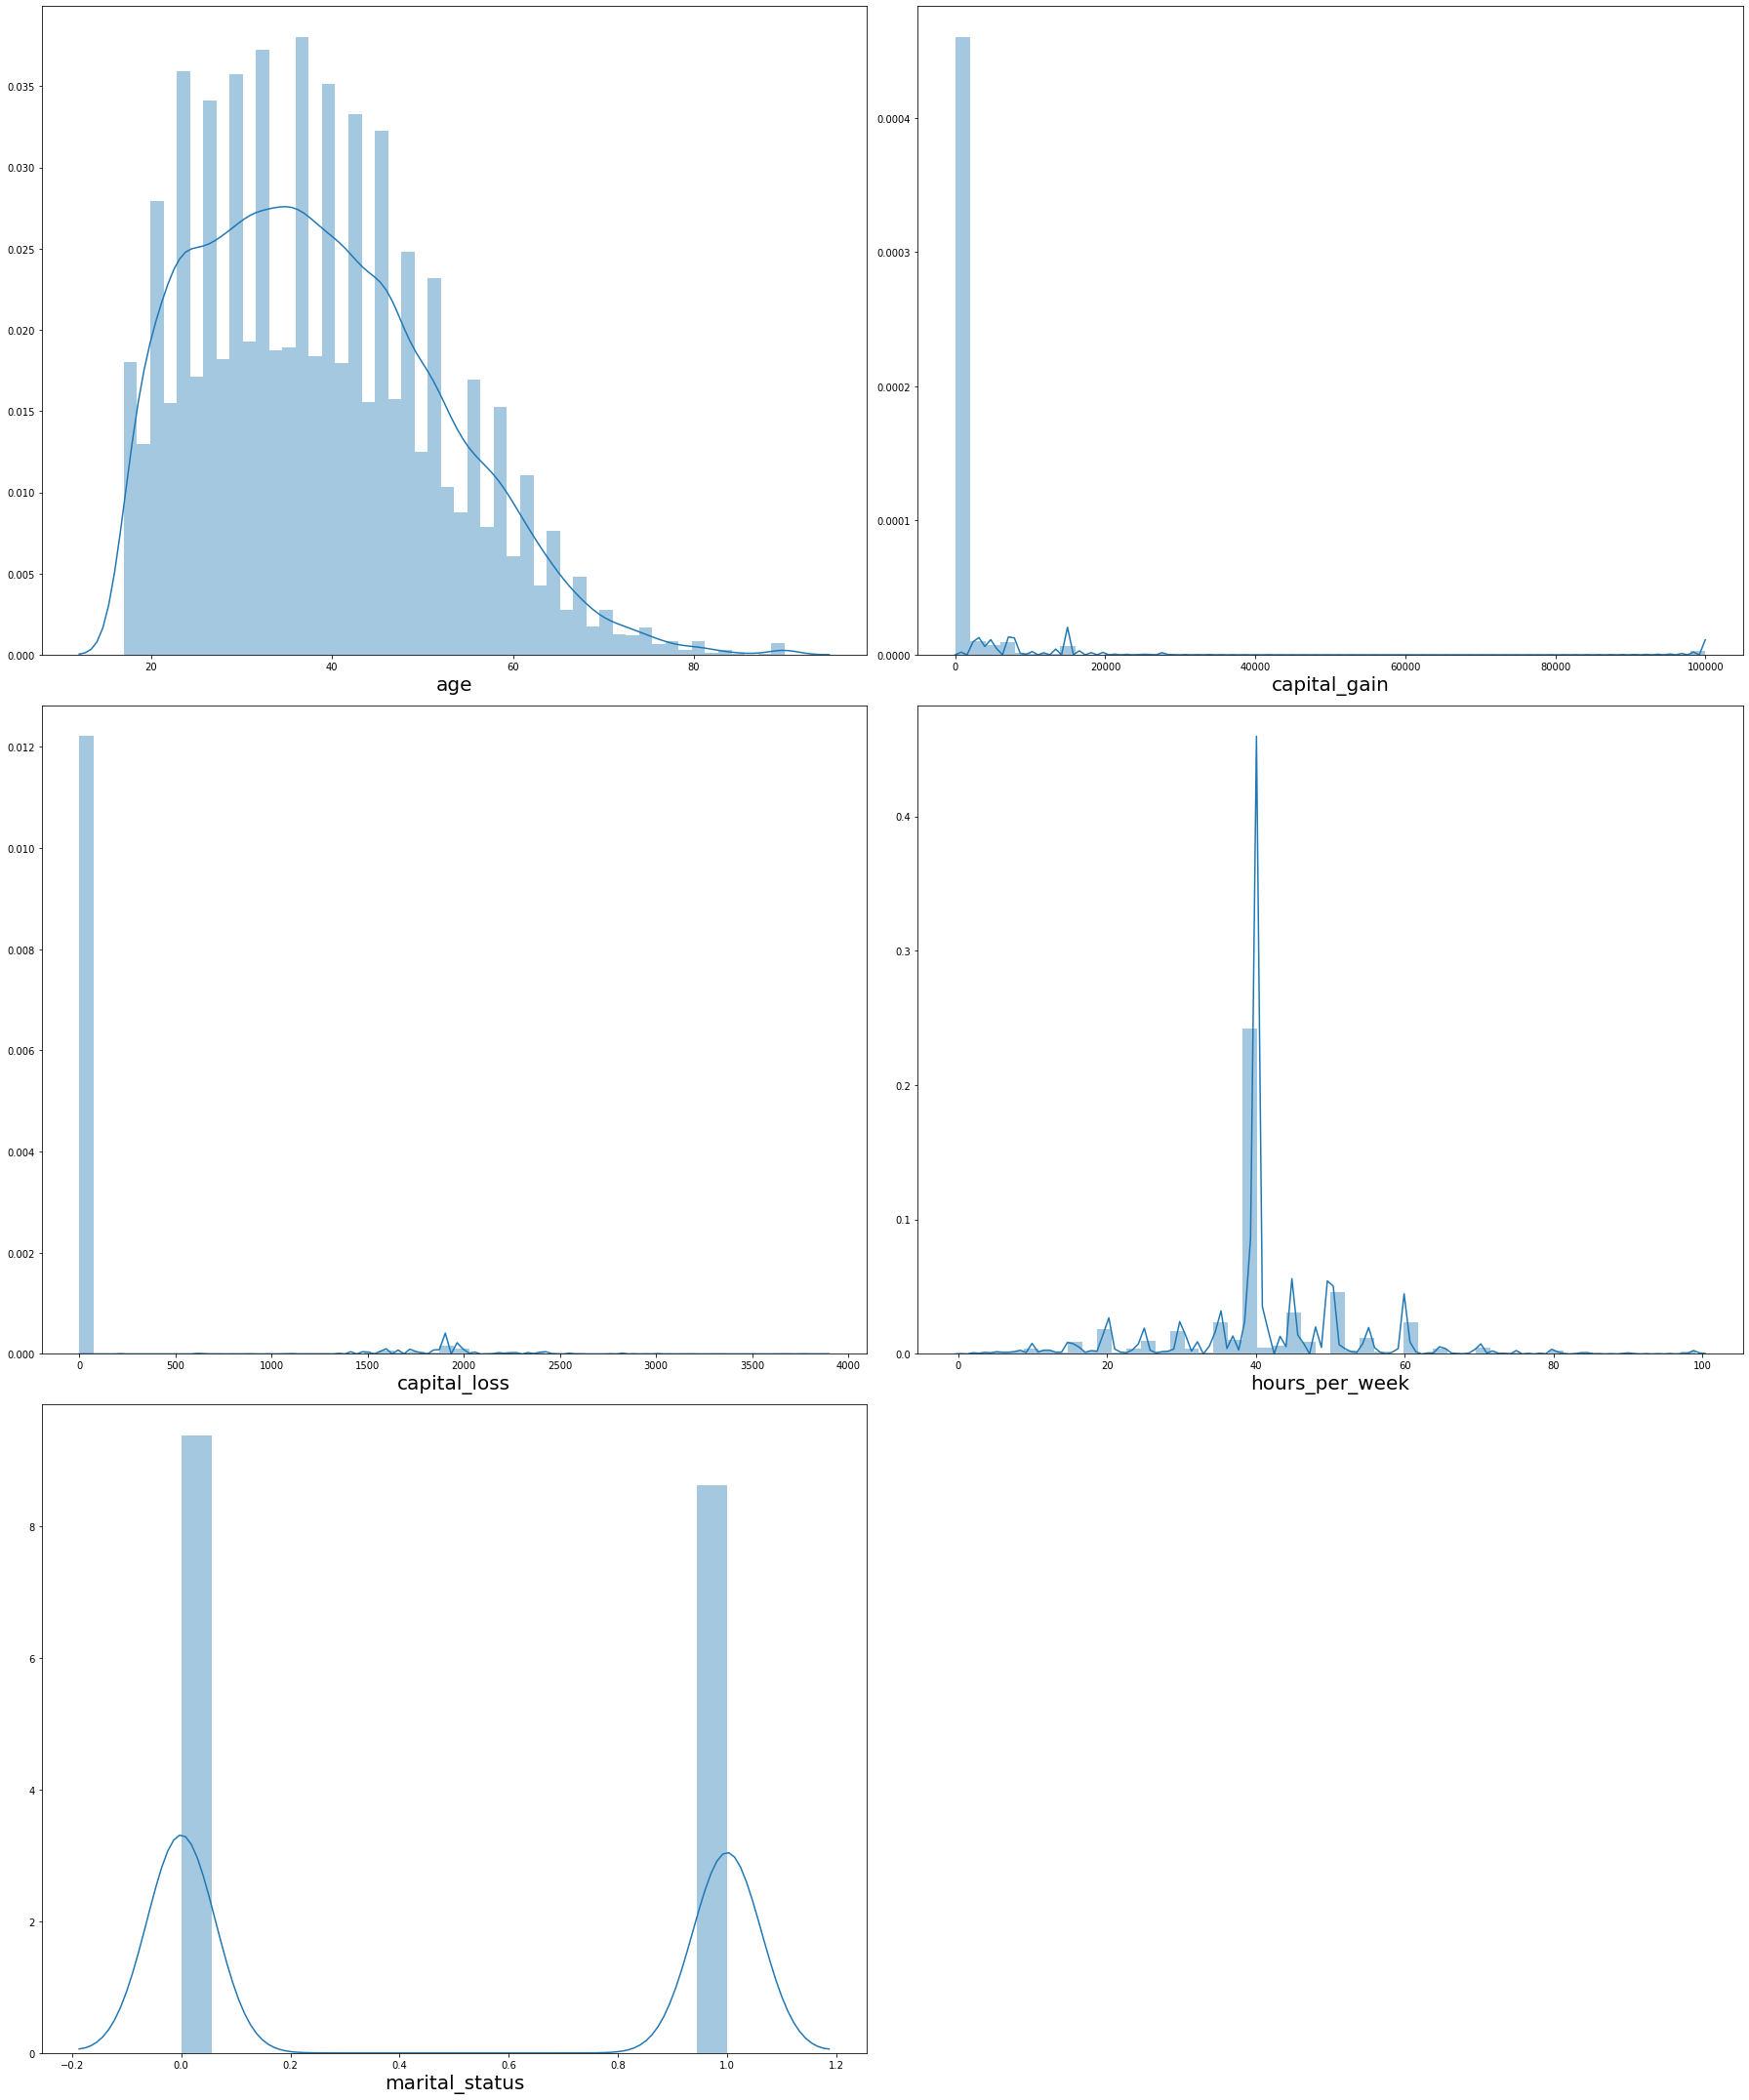

In [34]:
# performing some eda
plt.figure(figsize=(25,30),facecolor='white')
pltnum=1
for i in x[['age','capital_gain','capital_loss','hours_per_week','marital_status']]:
    if pltnum<=6:
        ax=plt.subplot(3,2,pltnum)
        sns.distplot(x[i])
        plt.xlabel(i,fontsize=20)
        #plt.ylabel('wages',fontsize=20)
    pltnum+=1
plt.tight_layout()

In [35]:
# we also droping the column relationship since there no effect on label
x=x.drop('relationship',axis=1)

In [36]:
x.head()

,age,workclass,education,marital_status,race,sex,capital_gain,capital_loss,hours_per_week
0,39,State-gov,Bachelors,0,White,Male,2174,0,40
1,50,Self-emp-not-inc,Bachelors,1,White,Male,0,0,13
2,38,Private,HS-grad,0,White,Male,0,0,40
4,28,Private,Bachelors,1,Black,Female,0,0,40
6,49,Private,9th,1,Black,Female,0,0,16


In [37]:
x.columns

Index(['age', 'workclass', 'education', 'marital_status', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week'],
      dtype='object')

In [38]:
# now we create dummy variable for column workclass,education,race,marital_status,sex
dummy=pd.get_dummies(x,columns=['workclass','education','race','marital_status','sex'])

In [39]:
dummy.head()

,age,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,education_ Some-college,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,marital_status_0,marital_status_1,sex_ Female,sex_ Male
0,39,2174,0,40,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,50,0,0,13,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
2,38,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,28,0,0,40,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
6,49,0,0,16,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [40]:
dummy.columns

Index(['age', 'capital_gain', 'capital_loss', 'hours_per_week',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'marital_status_0', 'marital_status_1', 'sex_ Female', 'sex_ Male'],
      dtype='object')

In [41]:
# to avoid dummy trap we drop one column from each category
X=dummy.drop(['workclass_ Federal-gov','education_ 11th','race_ Asian-Pac-Islander','marital_status_0','sex_ Female'],axis=1)

In [42]:
X.head()

,age,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,race_ Amer-Indian-Eskimo,race_ Black,race_ Other,race_ White,marital_status_1,sex_ Male
0,39,2174,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,50,0,0,13,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
2,38,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,28,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,49,0,0,16,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [43]:
# spliting dataset into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
ytrain.shape

(35397,)

In [50]:
from xgboost import XGBClassifier

xgb=XGBClassifier(objective='binary:logistic',seed=42)

xgb.fit(xtrain,ytrain,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(xtest,ytest)],verbose=True)


[0]	validation_0-aucpr:0.95413
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.95724
[2]	validation_0-aucpr:0.95927
[3]	validation_0-aucpr:0.96178
[4]	validation_0-aucpr:0.96215
[5]	validation_0-aucpr:0.96366
[6]	validation_0-aucpr:0.96481
[7]	validation_0-aucpr:0.96534
[8]	validation_0-aucpr:0.96644
[9]	validation_0-aucpr:0.96667
[10]	validation_0-aucpr:0.96689
[11]	validation_0-aucpr:0.96716
[12]	validation_0-aucpr:0.96753
[13]	validation_0-aucpr:0.96776
[14]	validation_0-aucpr:0.96833
[15]	validation_0-aucpr:0.96849
[16]	validation_0-aucpr:0.96859
[17]	validation_0-aucpr:0.96930
[18]	validation_0-aucpr:0.96930
[19]	validation_0-aucpr:0.96958
[20]	validation_0-aucpr:0.96971
[21]	validation_0-aucpr:0.97010
[22]	validation_0-aucpr:0.97027
[23]	validation_0-aucpr:0.97023
[24]	validation_0-aucpr:0.97029
[25]	validation_0-aucpr:0.97051
[26]	validation_0-aucpr:0.97062
[27]	validation_0-aucpr:0.97069
[28]	validation_0-aucpr:0.97076
[29]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:
from sklearn.metrics import accuracy_score

pred=xgb.predict(xtest)

acc=accuracy_score(ytest,pred)*float(100)
acc


86.33898305084746

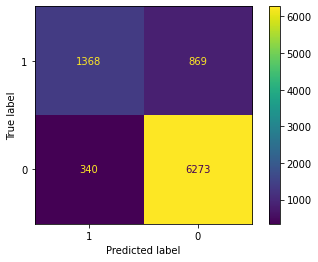

In [53]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb,xtest,ytest,values_format='d',display_labels=[1,0])


In [59]:
# parameter tunnig
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(XGBClassifier(objective='binary:logistic',subsample=0.9),
                  param_grid={'learning_rate':[1,0.5,0.1,0.01,0.001],
                              'max_depth': [3,4,5,8,10,12],'gamma':[0,0.25,1]},
                  verbose=2,
                  scoring='roc_auc',
                  n_jobs=-1,
                  cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 37.0min finished


{'gamma': 0, 'learning_rate': 0.5, 'max_depth': 3}

In [60]:
#xgb=XGBClassifier(learning_rate=0.1,max_depth=8,n_estimators=100)
#xgb.fit(xtrain,ytrain)
#pred=xgb.predict(xtest)

#acc=accuracy_score(ytest,pred)*float(100)
#acc

In [61]:
from xgboost import XGBClassifier

xgb=XGBClassifier(objective='binary:logistic',max_depth=3,gamma=0,learning_rate=0.5,seed=42)

xgb.fit(xtrain,ytrain,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(xtest,ytest)],verbose=True)


[0]	validation_0-aucpr:0.91914
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.94209
[2]	validation_0-aucpr:0.95288
[3]	validation_0-aucpr:0.95661
[4]	validation_0-aucpr:0.95948
[5]	validation_0-aucpr:0.96053
[6]	validation_0-aucpr:0.96229
[7]	validation_0-aucpr:0.96262
[8]	validation_0-aucpr:0.96346
[9]	validation_0-aucpr:0.96458
[10]	validation_0-aucpr:0.96524
[11]	validation_0-aucpr:0.96542
[12]	validation_0-aucpr:0.96547
[13]	validation_0-aucpr:0.96595
[14]	validation_0-aucpr:0.96643
[15]	validation_0-aucpr:0.96641
[16]	validation_0-aucpr:0.96673
[17]	validation_0-aucpr:0.96674
[18]	validation_0-aucpr:0.96683
[19]	validation_0-aucpr:0.96696
[20]	validation_0-aucpr:0.96724
[21]	validation_0-aucpr:0.96786
[22]	validation_0-aucpr:0.96798
[23]	validation_0-aucpr:0.96845
[24]	validation_0-aucpr:0.96857
[25]	validation_0-aucpr:0.96863
[26]	validation_0-aucpr:0.96883
[27]	validation_0-aucpr:0.96913
[28]	validation_0-aucpr:0.96918
[29]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [62]:
from sklearn.metrics import accuracy_score

pred=xgb.predict(xtest)

acc=accuracy_score(ytest,pred)*float(100)
acc

86.29378531073446

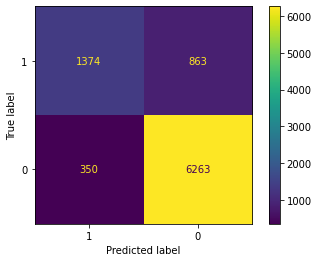

In [63]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb,xtest,ytest,values_format='d',display_labels=[1,0])